### Income Dataset
### Perform Binary Classification to predict if Salary is greater than $50K 

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


## Setup

### Import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as mp

### Load the Dataset

In [13]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Train dataset shape:", train_data.shape)
print("Test dataset shape:", test_data.shape)

Train dataset shape: (43957, 15)
Test dataset shape: (899, 14)


## Explore features

<h3>Data Columns Explanation</h3>

<ul>
  <li><strong>Age:</strong> Age of the person.</li>
  <li><strong>Workclass:</strong> Categorical variable indicating the type of work, e.g., Government or Private.</li>
  <li><strong>Fnlwgt:</strong> Final weight, a demographic weighting variable.</li>
  <li><strong>Education:</strong> Education level of the person.</li>
  <li><strong>Educational-num:</strong> Education represented as an integer.</li>
  <li><strong>Marital-status:</strong> Marital status of the person.</li>
  <li><strong>Occupation:</strong> Occupation of the person or job title.</li>
  <li><strong>Relationship:</strong> Relationship status of the person.</li>
  <li><strong>Race:</strong> Race of the person.</li>
  <li><strong>Gender:</strong> Gender of the person.</li>
  <li><strong>Capital-gain:</strong> Capital gain.</li>
  <li><strong>Capital-loss:</strong> Capital loss.</li>
  <li><strong>Hours-per-week:</strong> Hours worked per week.</li>
  <li><strong>Native-country:</strong> Native country of the person.</li>
  <li><strong>Income_>50K:</strong> Target column indicating whether the income is greater than $50K.</li>
</ul>


In [4]:
train_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## Data Cleaning

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
train_data.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

### Fill null values

In [7]:
# Replace missing values in 'workclass' column with mode
workclass_mode = train_data['workclass'].mode()[0]
train_data['workclass'].fillna(workclass_mode, inplace=True)
test_data['workclass'].fillna(workclass_mode, inplace=True)

# Replace missing values in 'occupation' column with mode
occupation_mode = train_data['occupation'].mode()[0]
train_data['occupation'].fillna(occupation_mode, inplace=True)
test_data['occupation'].fillna(occupation_mode, inplace=True)

# Replace missing values in 'native-country' column with mode
native_country_mode = train_data['native-country'].mode()[0]
train_data['native-country'].fillna(native_country_mode, inplace=True)
test_data['native-country'].fillna(native_country_mode, inplace=True)


In [8]:
train_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

Check if the data is balanced or not 

(array([33439.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10518.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

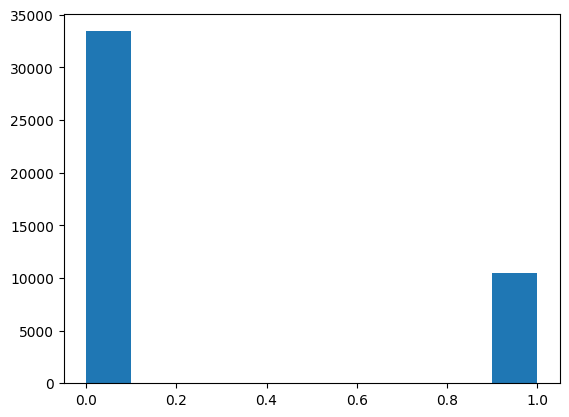

In [9]:
train_data["income_>50K"].value_counts()
mp.hist(train_data["income_>50K"])

In [10]:
selected_zero_columns = train_data.loc[train_data['income_>50K'] == 0].iloc[:, :10000]
selected_one_columns = train_data.loc[train_data['income_>50K'] == 1].iloc[:, :10000]
final_data = pd.concat([selected_zero_columns,selected_one_columns])
final_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,39,Private,33355,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1
43943,53,Private,153064,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1
43946,47,Private,420986,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
43948,44,Private,247880,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,8614,0,40,United-States,1


In [11]:
# Separate input features and target variable
X = train_data.drop('income_>50K', axis=1)
y = train_data['income_>50K']

In [12]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(include='object').columns

# Normalize numerical columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols)
print("Preprocessed dataset:", X.shape)

Preprocessed dataset: (43957, 105)
